# Deep Learning

# Image Classification

in classical ML we work with Tabular data (tables)

In Deep Learning we can work with images

### Project (Fashion Classification)  
- Classify types of Clothes by images  
it is multiclass classification

git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

this is top-10 categories of Clothes  
- all images are already split into Train, Validation and Test folders, each having all categories

# Setting up the Environment on Saturn Cloud

- create a new environment
- add ssh key to be able to connect to github from Saturn cloud notebook

Since we need Notebook with GPU for processing images, we will use notebook from Saturn cloud

In [1]:
import tensorflow as tf
tf.__version__

'2.11.0'

# TensorFlow and Keras

TensorFlow is framework for Deep Learning: train DL models  
Keras is higher level abstraction on top of TensorFlow

In [2]:
# tensorflow:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

import numpy as np
from matplotlib import pyplot as plt

let's try to load one image to see how we can do it, using Keras

In [3]:
path = './clothing-dataset-small/train/t-shirt'
name = '01ace8a7-7621-478e-af83-cd4fac4cb157.jpg'
fullname = path + '/' + name
#fullname = './clothing-dataset-small/train/t-shirt/01ace8a7-7621-478e-af83-cd4fac4cb157.jpg'

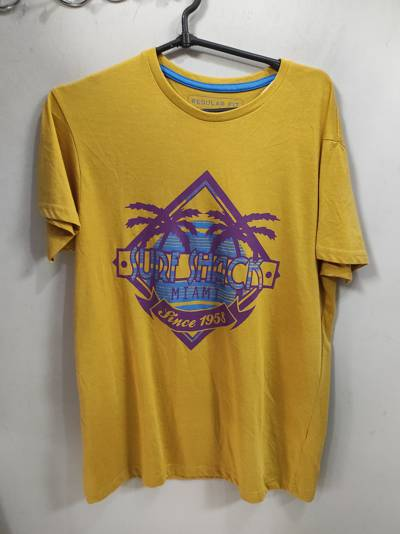

In [4]:
load_img(fullname)

We can specify size of the image while loading. It is required, since Neural Networks need images of specific size to operate

In [5]:
img = load_img(fullname, target_size=(299, 299))

![](./pic/1.png)

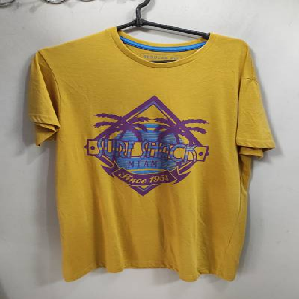

In [6]:
img

In [7]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x27BCD456410>


there is a special library for images processing: **PIL (python image library)**

Each image can be represented by Array with 3 channels:  
- Red
- Green
- Blue  
for each channel there is an array (0-255, which is 1-byte)

![](./pic/2.png)

each pixel is coded with 3 numbers (R, G, B), which we can easily translate:  


In [8]:
np.array(img)

array([[[129, 128, 126],
        [158, 157, 155],
        [152, 151, 149],
        ...,
        [208, 209, 204],
        [206, 207, 202],
        [205, 206, 201]],

       [[137, 136, 134],
        [163, 162, 160],
        [155, 154, 152],
        ...,
        [208, 209, 204],
        [207, 208, 203],
        [205, 206, 201]],

       [[135, 134, 132],
        [149, 148, 146],
        [151, 150, 148],
        ...,
        [209, 210, 205],
        [208, 209, 204],
        [206, 207, 202]],

       ...,

       [[104, 100,  89],
        [104, 100,  91],
        [105, 101,  92],
        ...,
        [159, 158, 154],
        [159, 158, 154],
        [159, 158, 154]],

       [[103,  99,  88],
        [104, 100,  91],
        [104, 100,  91],
        ...,
        [158, 157, 153],
        [158, 157, 153],
        [158, 157, 153]],

       [[102,  98,  87],
        [103,  99,  90],
        [103,  99,  90],
        ...,
        [157, 156, 152],
        [157, 156, 152],
        [157, 156, 152]]

In [9]:
x = np.array(img)
x.shape

(299, 299, 3)

we can see that dtype of array is **uint8**, which means that values are "unsigned" (no sign, no negative values, 0-255) int8 - integer that takes 8 bits (1 byte)

# Pre-trained Convolutional Neural Networks

- Imagenet dataset: http://www.image-net.org/
- Pre-trained models: http://keras.io/api/applications/

imagenet is big dataset with 1000 different classes and 1 300 000 images  
keras has pretrained  models

Some organization with powerful computers can use a whole huge dataset to train big models (Neural Networks) and then shared results

We will take "Xception" model from Keras Applications for example, since it has good trade off between size and speed: https://keras.io/api/applications/xception/

In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

In [11]:
# load model
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [12]:
# load image
img = load_img(fullname, target_size=(299, 299))

since this model takes Batch of images as input, we can put our 1 image into array:

In [13]:
# put image into array:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [14]:
model.predict(X)

1/1 [==============================] - 1s 731ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

prediction output does not make sense now, since this model requires some preprocessing:

In [15]:
# data preprocessing:
X = preprocess_input(X)

we can see that preprocessing function converted each number to value from -1 to 1

In [16]:
pred = model.predict(X)

1/1 [==============================] - 1s 598ms/step


In [17]:
pred.shape

(1, 1000)

the prediction is probability that image belongs to one of 1000 classes, to be able to see which class, we should know what classes were used in training:

In [18]:
from tensorflow.keras.applications.xception import decode_predictions

In [19]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.9114028),
  ('n04370456', 'sweatshirt', 0.0105202375),
  ('n03710637', 'maillot', 0.005817425),
  ('n04532106', 'vestment', 0.0057464927),
  ('n04599235', 'wool', 0.0019823462)]]

we can that the top-1 most probable class is "jersey", it looks similar, but not exactly what we expected  
the reason for that is during training there was now exactly t-shirt class, therefore this model does not serve our goal for Clothes classification

# Convolutional Neural Networks (CNN)

- Types of layers: 
    - convolutional and 
    - dense
- Convolutional layes and filters
- Dense Layers

CNN are used for images mostly.   
They Consist of different types of layers, and some of them are convolutional.

1. Convolutional layers
2. Dense Layers

![](./pic/3.png)

## Convolutional layers

they consist of filters (kind of small images), which contain simple shapes

then we take each filter (basic shape) and put it into each cell (subarea) of an image and calculate some measure of similarity between them, producing "feature map" for each filter
- feature map - table with values of similarity between cell and filter

![](./pic/4.png)

as the result we have 1 feature map per filter and therefore we have several feature maps 

- output of first convolutional layer - set of feature maps

- then we can take this Set of Feature maps and treat it as "Image" such result image can then be used on the other convolutional layers with its own set of filters

![](./pic/5.png)

each convolutiional layer can have more and more complex filters  
for example we may have 3 of such layers:
- 1st with simple filters
- 2nd more complex shapes (filters) - some angles crosses etc (combination of filters from previous layers)
- 3rd even more complex

![](./pic/6.png)

it is not how exactly filters look like, but we can think of them in that way

![](./pic/7.png)

we can see how 2 lines can form a cross for next layer

therefore, the more layers we have the more complex features we can find in image (sleeves for T-Shirt etc)

so we take image - pass it to the set of Convolutional layers and in the result we have - **Vector Representation of image** (1D), which captures all features of image  
then we can build Dense Layers

# Dense Layers

![](./pic/8.png)

roll of Dense layers is used to make a final prediction on Vector representation of image

![](./pic/9.png)

for example, we can consider Binary classification (T-shirt or not) for that we can use something like Logistic regression (function that take as input vector representation of an image and as output returns probability that it is an image of a T-shirt)

- similarly to logistic regression, each feature would have a W (weight), sum and multiply etc.
- apply sigmoid and give probability

![](./pic/10.png)

that how it would look like in case of binary classification

if we need to make multi class modeel: we can build model for each class and therefore, compare probabilities: but in case of multi class we should use "Soft Max" (generalization of sigmoid for multiple classes)  
the output would store probabilities of image being of particular class

![](./pic/11.png)

Dense layer we have between Vector Representation of an image and output
- Dense Layer, because all elements of Input vector are connected to all elements of Output vector

![](./pic/12.png)

for each element of the output we have weight (w1, w2...), which form W (weight vector)  
- therefore, all we need to do to get the answer - Multiply Vector of Image (X) on Weights vector (W)

we also can put multiple Dense Layers together:

![](./pic/13.png)

# Transfer Learning

- Reading data with "ImageDataGenerator"
- Train Xception on smaller images (150x150)

Previously we tried to use "Xception" model, (CNN) which is already trained  
in other words it is trained to convert images into Their Vector representation  
it is doing that by using filters, which are quite generic (they are learned, crated in the process of learning)  
Therefore, we can use this filters now for our purposes

we have no need to change such filters, since models require to see big amount of images to train them, it time and resources consuming process

But Dense layers are specific to a dataset, there are more than 1000 classes, which do not need for our purposes, and some classes that we need are not there,  
therefore we need to Train New Dense Layers  
- this technique is called **Transfer Learning**

![](./pic/14.png)

let's see how we can do it with Keras

1st we need to read Images, for that we can use ImageDatagenerator class from Keras

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

We apply Preprocessing function to each image

In [21]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

We will use smaller images, since training will be faster and we can experiment faster (target_size), then we can retrain on a bigger images  
we can also specify how many images we will read at a time (batch_size)

In [22]:
# read from directory:
train_ds = train_gen.flow_from_directory( # train dataset
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
    )

Found 3068 images belonging to 10 classes.


In [23]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

this function reads classes names from folder structure (name of class = name of folder)

In [24]:
X, y = next(train_ds)

In [25]:
X.shape

(32, 150, 150, 3)

- 32 pictures in one batch
- 150x150 - size of each image
- 3 number of channels for each image

In [26]:
y[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

for labels of classes, it uses One-hot encoding

In [27]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

The last column answers the question is image of class T-Shirt  
- It is the approach for Multi class classification problem can be solved
- It can be considered as 10 different Binary classification models working together

### Validation data reading

In [28]:
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size = (150, 150),
    batch_size = 32,
    shuffle = False # by default generator shuffles data, but for validation it is not required
)

Found 341 images belonging to 10 classes.


### Model creation  
- we keep convolutional layers from Xception model
- train our model with 10 classes on top of base model

In Keras, it is a bit different how Convolutional Neural Networks are imagined, the difference is that in Keras CNN are imagined building from bottom to the Top, therefore, since we want to keep only Convolutional Layers and Do not include Dense layers, we specify parameter "include_top=False"
![](./pic/15.png)

we also specify "trainable" parameter as False, since we do not want to change Convolutional layers

In [29]:
# base model:  
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
    )

base_model.trainable = False

### Create a New top layers (Dense Layers)

inputs - part of the model, that will receive images  


In [30]:
inputs = keras.Input(shape = (150, 150, 3))

this inputs go into the Base model

In [31]:
base = base_model(inputs)
base

<KerasTensor: shape=(None, 5, 5, 2048) dtype=float32 (created by layer 'xception')>

In [32]:
outputs = base

In [33]:
model = keras.Model(inputs, outputs)
model

In [34]:
preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [35]:
preds.shape

(32, 5, 5, 2048)

- we have 32 images in 1 batch
- therefore, for 1 image we would have 5x5x2048 3D array
    - at this time it does not yet look like Vector representation of image
    - so now, we want to turn this into a vector (1D), we can do it by slice for 2048 2D slices (5x5), and take Average of these and add to the New 1D vector (**"Pooling"**)

![](./pic/16.png)

- Pooling - operation, when we take some object with high number of dimensions and reduce amount of dimensions 
    - in this case it is 2D Average Pooling

In [36]:
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs)

# add pooling:
pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)

outputs = vectors

model = keras.Model(inputs, outputs)

In [37]:
preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [38]:
preds.shape

(32, 2048)

Now we have 32 of 1D vectors for each image

this style of building CNN model is called **"functional"**, since we use Base model as function

![](./pic/17.png)

to get predictions from our new model, we will provide 10 values of probabilities for each class, therefore output will be 1x10 for each image  
to Achieve that, we need to create a Dense Layer

In [39]:
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)

# add pooling:
pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [40]:
preds = model.predict(X)


1/1 [==============================] - 1s 1s/step


In [41]:
preds.shape

(32, 10)

- each image is used as Input
- image goes to base model, which produces long 3D output
- which is turned then into 1D vector, by using Pooling
- then we add Dense layers to produce predictions

for now, if we look at the predictions we have, we will see that now it is some random numbers, since we have not trained the model yet

In [42]:
preds[0]

array([ 0.6091473 , -0.46377748,  1.1065614 ,  0.11807168,  1.0495403 ,
        0.30632496, -0.53537536, -0.03926815,  0.4716119 ,  0.6866268 ],
      dtype=float32)

to train the model we need:
- optimizer - operator, which finds the best Weights in Dense layers
    - it changes the weights many times trying to find the best combination
    - it does this in the efficient way

there are several optimizers inside Karas, the  documentation now recommends using Adam:  
- it has several parameters, but the most important one is: "learning rate"

In [43]:
# keras optimizer:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
optimizer

then the optimizer needs to know, how to change the weights
- how optimizer understands when it changes the weights, that the result is better or not

for that the "Loss" concept is exists, which tells us how good the model is:
- Categorical cross entropy for multi class classification problems
- Binary cross entropy for binary classification problems
- Mean Squared Error for Regression tasks

In [44]:
# loss:
loss = keras.losses.CategoricalCrossentropy(from_logits=True) # from logits = True  for Raw values without Activation

![](./pic/18.png)

- "Soft max" is the activation function
    - it is the function which we apply to values to produce probabilities
    - if we apply this function we get probabilities as the result
    - if we do not apply this function we get raw values

here we specify, that we will not apply activation, otherwise we would have to specify which activation we want to apply:  
- keras.layers.Dense(activation = 'softmax')

In [45]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

- epochs - how many time we go through dataset

In [46]:
# all in one cell:
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)

# add pooling:
pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)
outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)


# keras optimizer:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
# loss:
loss = keras.losses.CategoricalCrossentropy(from_logits=True) # from logits = True  for Raw values without Activation
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [47]:
# history = model.fit(train_ds, epochs=10, validation_data=val_ds)

accuracy - for how many images we managed to make correct prediction, values that we see during training process are accuracy on Training data and Validation data:
- we should carefully monitor accuracy on both datasets and compare, to make sure model is not overfitted

In [48]:
#plt.plot(history.history['accuracy'], label='train')
#plt.plot(history.history['val_accuracy'], label='val')
#plt.legend()

even without tuning we have reasonably good model, but of course there are many parameters to tune:
- one of the most important parameter is **Learning Rate**

# Learning Rate

good analogy of learning rate for CNN - is how fast humans can read:
- (overfit) if we read many books each year (> 100) if may be simply looking through, or just read basic concepts
- (underfit) but if we read 1 book per year, we may take notes and remember every single word from the book

In [49]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable=False

    ##############################
    # architecture:
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    # add pooling:
    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    ##############################
    # keras optimizer:
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    # loss:
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # from logits = True  for Raw values without Activation
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy'])

    return model

In [51]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    print()

Epoch 1/10
96/96 [==============================] - 106s 1s/step - loss: 1.9150 - accuracy: 0.3370 - val_loss: 1.5530 - val_accuracy: 0.5425
Epoch 2/10
96/96 [==============================] - 110s 1s/step - loss: 1.3710 - accuracy: 0.5727 - val_loss: 1.2141 - val_accuracy: 0.6452
Epoch 3/10
96/96 [==============================] - 106s 1s/step - loss: 1.1270 - accuracy: 0.6441 - val_loss: 1.0491 - val_accuracy: 0.6774
Epoch 4/10
96/96 [==============================] - 107s 1s/step - loss: 0.9909 - accuracy: 0.6822 - val_loss: 0.9428 - val_accuracy: 0.7067
Epoch 5/10
96/96 [==============================] - 115s 1s/step - loss: 0.9012 - accuracy: 0.7138 - val_loss: 0.8740 - val_accuracy: 0.7331
Epoch 6/10
96/96 [==============================] - 117s 1s/step - loss: 0.8346 - accuracy: 0.7383 - val_loss: 0.8284 - val_accuracy: 0.7331
Epoch 7/10
96/96 [==============================] - 125s 1s/step - loss: 0.7825 - accuracy: 0.7500 - val_loss: 0.7884 - val_accuracy: 0.7419
Epoch 8/10
96

learning rate = 0.0001
learning rate = 0.001
learning rate = 0.01
learning rate = 0.1


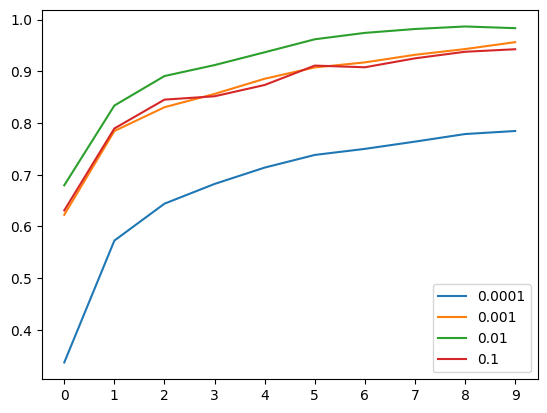

In [53]:
for lr, hist in scores.items():
    print(f'learning rate = {lr}')
    plt.plot(hist['accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()
    

- we can see that the model with the lowest learning rate reaches 70% accuracy only after 10 epochs  
now, we can take a look at the accuracy on validation data: 

learning rate = 0.0001
learning rate = 0.001
learning rate = 0.01
learning rate = 0.1


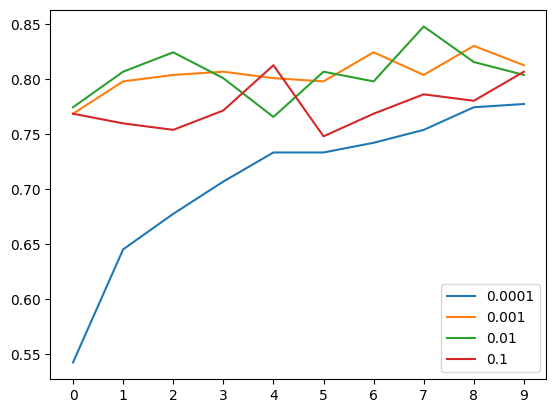

In [54]:
for lr, hist in scores.items():
    print(f'learning rate = {lr}')
    plt.plot(hist['val_accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()
    

we can see that the model with low learning rate steadily improves its performance, but too slow  
now we will drop smallest and largest LR models from graph:

learning rate = 0.001
learning rate = 0.01


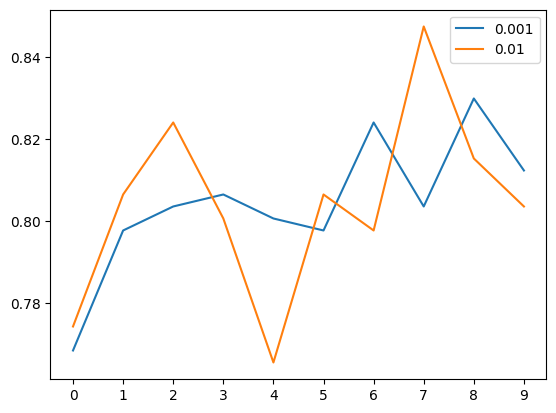

In [55]:
do_not_show_list = [0.1, 0.0001]

for lr, hist in scores.items():
    if lr in do_not_show_list:
        continue
    else:
        print(f'learning rate = {lr}')
        plt.plot(hist['val_accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()
    

model with lower Learning Rate is visually more stable and on generally better in the performance

In [56]:
learning_rate = 0.001

# CheckPointing

by carefully looking on logs of models training, we can spot the Epoch at which model starting to Overfit, (accuracy on Validation drops), and therefore, we might want to save the model on each Epoch, to then use the best model
- it is called **Checkpointing**

![](./pic/19.png)

- after each Epoch we can do something, for example calculating accuracy, or save model
    - it is called callbacks

there are multiple different callbacks in keras, now we are interested in ModelCheckpoint:
- name of file to save with proper formatting
- save_best_only - we save only the model where we observe increase of accuracy on validation data  
![](./pic/20.png)  

- monitor - metrics which we are interested in
- mode - maximize or minimize, depending on what metric is chosen

In [60]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [61]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint] # add callback
)

Epoch 1/10
96/96 [==============================] - 106s 1s/step - loss: 1.1184 - accuracy: 0.6268 - val_loss: 0.7152 - val_accuracy: 0.7654
Epoch 2/10
96/96 [==============================] - 110s 1s/step - loss: 0.6407 - accuracy: 0.7784 - val_loss: 0.6399 - val_accuracy: 0.7830
Epoch 3/10
96/96 [==============================] - 124s 1s/step - loss: 0.5085 - accuracy: 0.8253 - val_loss: 0.5785 - val_accuracy: 0.8123
Epoch 4/10
96/96 [==============================] - 117s 1s/step - loss: 0.4293 - accuracy: 0.8654 - val_loss: 0.5596 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 119s 1s/step - loss: 0.3706 - accuracy: 0.8856 - val_loss: 0.5363 - val_accuracy: 0.8328
Epoch 6/10
96/96 [==============================] - 118s 1s/step - loss: 0.3310 - accuracy: 0.9009 - val_loss: 0.5462 - val_accuracy: 0.8299
Epoch 7/10
96/96 [==============================] - 115s 1s/step - loss: 0.2890 - accuracy: 0.9208 - val_loss: 0.5204 - val_accuracy: 0.8270
Epoch 8/10
96

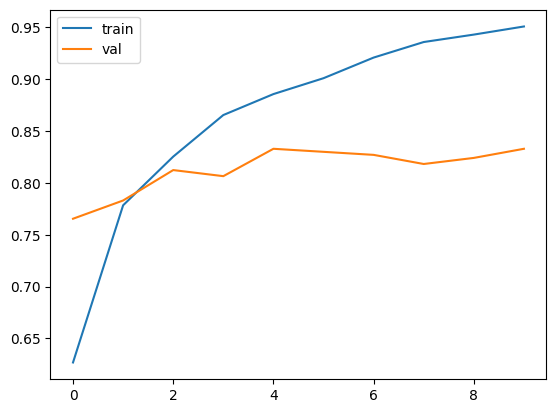

In [62]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()

After, training is finished, we can see that 4 models have been saved  
And on the Graph of Validation Accuracy, we can see that after 4 epochs accuracy of Validation stopped increasing and even decrease a little

now we can delete all models with lower accuracy and save only the model after Epoch 5 

Then, we will add new layers to the model and therefore, create Version 2 (v2) of the model

# Adding more layers

it might be beneficial to add new Layers to the model between Vector Representation of image and final prediction

In [1]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable=False

    ##############################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)

    # add inner layer:
    inner = keras.layers.Dense(size_inner)(vectors)

    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    
    ##############################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # from logits = True  for Raw values without Activation
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy'])

    return model

now our model would look like this schematically:  
![](./pic/21.png)

but this is not enough:
- usually in CNN at the end we have Activation function (Soft max), which takes raw scores and transforms into Probability,
- therefore, for our new Dense Layer, we also need Activation function, (now we will try "Relu")  
![](./pic/22.png)

there are many different Activation functions:  
- Output functions:
    - Sigmoid
    - Softmax
- Intermediate:
    - ReLu
    - etc

![](./pic/23.png)

it is one of the most popular activation function for intermediate layers

In [52]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable=False

    ##############################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)

    # add inner layer:
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    
    ##############################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # from logits = True  for Raw values without Activation
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy'])

    return model

In [53]:
# experiment with intermediate layer size
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print('----------------------------------')
    print(f'size = {size}')

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data = val_ds)
    scores[size] = history.history
    print('----------------------------------')

----------------------------------
size = 10
Epoch 1/10
96/96 [==============================] - 132s 1s/step - loss: 1.5792 - accuracy: 0.4221 - val_loss: 1.2268 - val_accuracy: 0.5660
Epoch 2/10
96/96 [==============================] - 125s 1s/step - loss: 1.0612 - accuracy: 0.6196 - val_loss: 0.9133 - val_accuracy: 0.6716
Epoch 3/10
96/96 [==============================] - 118s 1s/step - loss: 0.7878 - accuracy: 0.7298 - val_loss: 0.7858 - val_accuracy: 0.7331
Epoch 4/10
96/96 [==============================] - 114s 1s/step - loss: 0.6632 - accuracy: 0.7751 - val_loss: 0.7394 - val_accuracy: 0.7507
Epoch 5/10
96/96 [==============================] - 111s 1s/step - loss: 0.5769 - accuracy: 0.8096 - val_loss: 0.7161 - val_accuracy: 0.7595
Epoch 6/10
96/96 [==============================] - 111s 1s/step - loss: 0.5040 - accuracy: 0.8328 - val_loss: 0.6851 - val_accuracy: 0.7683
Epoch 7/10
96/96 [==============================] - 110s 1s/step - loss: 0.4512 - accuracy: 0.8540 - val_loss

we can see how much GPU is utilized during training:  
- *nvidia-smi*

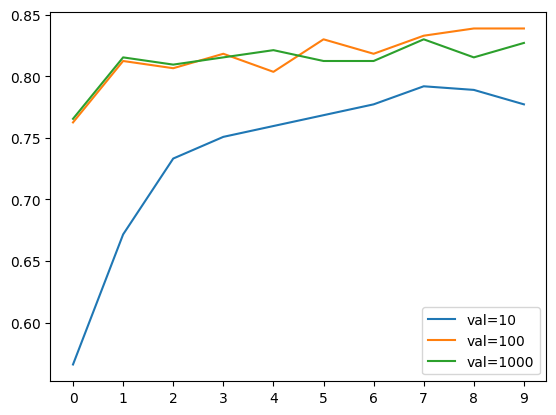

In [54]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=(f'val={size}'))

plt.xticks(np.arange(10))
plt.legend()

seems that size=100 is the best one

In [1]:
size = 100

# Regularization

- Regularizing by freezing a part of the network (**Dropout**)
- Adding dropout to the model
- Experiment with different values

on some T-shirt we might have some logo, and since we train CNN using 10 epochs, model sees that logo 10 times and might have conclusion that it is and important feature, while actually, such logo can be on different kinds of Clothes, for example Hat:  
we want model to remember more general patterns like sleeves etc.

![](./pic/24.png)

what if we hide a different part of an image on each epoch:  
![](./pic/25.png)

- **Drop out** -  this is the main idea of dropout: hide a part of image during training 
    - on practice, it does not really works in the way described above, but it applies this idea to inner layers  
    ![](./pic/26.png)

on dense layer, in 1 iteration, we say that a particular part of inner layer is "frozen", or in other words this layer is not updated

when we do this we force a model to pay attention on bigger picture: shape and on the details

![](./pic/27.png)

- on the previous step we added a dense inner layer with and experimented with different sizes of it: 10, 100, 1000 and 100 was chosen as the best one
- so now we want to add Dropout on this inner layer

In [58]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable=False

    ##############################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    # dropout:
    drop = keras.layers.Dropout(droprate)(inner) # droprate - how big size of inner layer we want to freeze

    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    ##############################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # from logits = True  for Raw values without Activation
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy'])

    return model

![](./pic/28.png)

In [63]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print('--------------------')
    print(f'droprate = {droprate}')


    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history
    print('--------------------')

--------------------
droprate = 0.0
Epoch 1/30
96/96 [==============================] - 121s 1s/step - loss: 0.9576 - accuracy: 0.6806 - val_loss: 0.6624 - val_accuracy: 0.7683
Epoch 2/30
96/96 [==============================] - 115s 1s/step - loss: 0.5039 - accuracy: 0.8263 - val_loss: 0.6465 - val_accuracy: 0.7889
Epoch 3/30
96/96 [==============================] - 99s 1s/step - loss: 0.3588 - accuracy: 0.8823 - val_loss: 0.5627 - val_accuracy: 0.8123
Epoch 4/30
96/96 [==============================] - 103s 1s/step - loss: 0.2406 - accuracy: 0.9302 - val_loss: 0.5906 - val_accuracy: 0.8065
Epoch 5/30
96/96 [==============================] - 141s 1s/step - loss: 0.1741 - accuracy: 0.9547 - val_loss: 0.5907 - val_accuracy: 0.8006
Epoch 6/30
96/96 [==============================] - 154s 2s/step - loss: 0.1231 - accuracy: 0.9723 - val_loss: 0.6070 - val_accuracy: 0.8211
Epoch 7/30
96/96 [==============================] - 137s 1s/step - loss: 0.0888 - accuracy: 0.9840 - val_loss: 0.6365 -

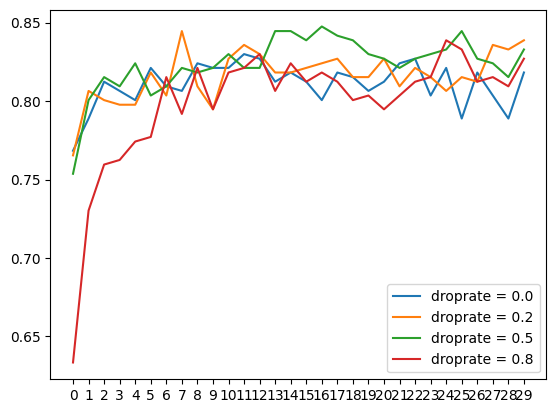

In [64]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=f'droprate = {droprate}')

plt.xticks(np.arange(30))
plt.legend()

- we can easily observe that very large droprate = 0.8 (80% of items in inner layer are frozen) is the worst one
- and we can see that droprate=0.5 has the largest values  of accuracy

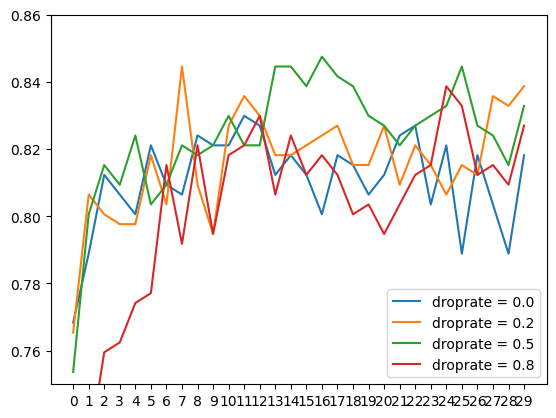

In [68]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=f'droprate = {droprate}')

plt.xticks(np.arange(30))
plt.ylim(0.75,0.86)
plt.legend()

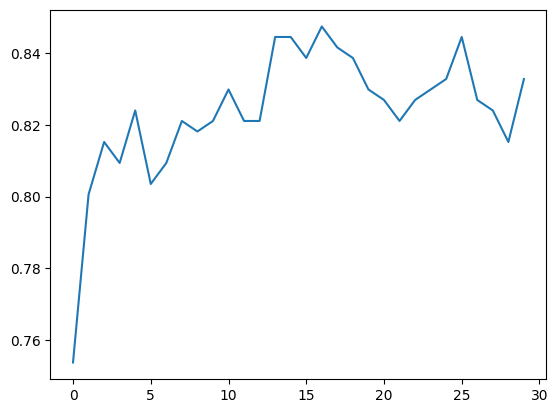

In [70]:
hits_best = scores[0.5]
plt.plot(hits_best['val_accuracy'])

Eventhough, we have quite large Regularization by large dropout rate = 50%, we still might have overfitting, since the number of epochs is quite big, therefore let's also look at Train and Validation scores at the same time:

([<matplotlib.axis.XTick at 0x15b9dceeb60>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29')])

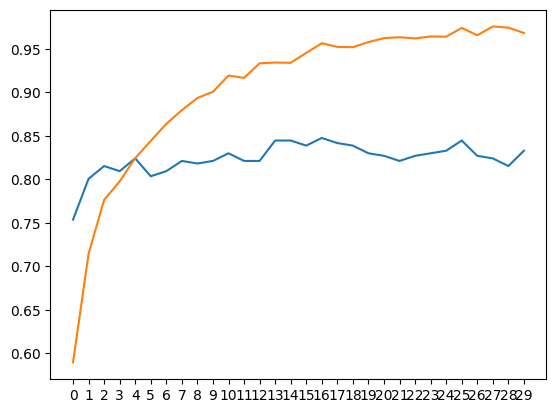

In [72]:
hits_best = scores[0.5]
plt.plot(hits_best['val_accuracy'])
plt.plot(hits_best['accuracy'])
plt.xticks(np.arange(30))

we can see that even with high Droprate model manages to learn a lot on training dataset and gradually improve accuracy on training dataset, therefore, epoch = 4 is quite good

In [89]:
import pandas as pd

droprate_results = []
for epoch in range(1, len(scores[0.5]['val_accuracy']) + 1):
    val_accuracy_iter = scores[0.5]['val_accuracy'][epoch-1]
    print(f'epoch: {epoch}, val_accuracy = {val_accuracy_iter}')
    droprate_results.append((epoch, val_accuracy_iter))

columns = ['epoch', 'val_accuracy']
df_droprate = pd.DataFrame(droprate_results, columns = columns)

epoch: 1, val_accuracy = 0.7536656856536865
epoch: 2, val_accuracy = 0.8005865216255188
epoch: 3, val_accuracy = 0.8152492642402649
epoch: 4, val_accuracy = 0.8093841671943665
epoch: 5, val_accuracy = 0.8240469098091125
epoch: 6, val_accuracy = 0.803519070148468
epoch: 7, val_accuracy = 0.8093841671943665
epoch: 8, val_accuracy = 0.8211143612861633
epoch: 9, val_accuracy = 0.8181818127632141
epoch: 10, val_accuracy = 0.8211143612861633
epoch: 11, val_accuracy = 0.829912006855011
epoch: 12, val_accuracy = 0.8211143612861633
epoch: 13, val_accuracy = 0.8211143612861633
epoch: 14, val_accuracy = 0.8445748090744019
epoch: 15, val_accuracy = 0.8445748090744019
epoch: 16, val_accuracy = 0.8387096524238586
epoch: 17, val_accuracy = 0.8475073575973511
epoch: 18, val_accuracy = 0.8416422009468079
epoch: 19, val_accuracy = 0.8387096524238586
epoch: 20, val_accuracy = 0.829912006855011
epoch: 21, val_accuracy = 0.8269794583320618
epoch: 22, val_accuracy = 0.8211143612861633
epoch: 23, val_accurac

In [92]:
df_droprate

,epoch,val_accuracy
0,1,0.753666
1,2,0.800587
2,3,0.815249
3,4,0.809384
4,5,0.824047
5,6,0.803519
6,7,0.809384
7,8,0.821114
8,9,0.818182
9,10,0.821114


In [91]:
df_droprate[df_droprate['epoch'] == 4]

,epoch,val_accuracy
3,4,0.809384


we will go with dropout = 0.2

# Data Augmentation

- previously, we discussed a problem that if during training, CNN sees the same image many times, it may remember it very well, which later will reduce its generalization power
    - one approach is dropout

- Data Augmentation - a different approach to solve this problem, which involves generating more images from existing ones
    - so CNN will see slightly different images every time

image transformations:
- flit image
    - horizontally or vertically

![](./pic/29.png)

for our dataset it is not beneficial type of transformation, since all images in our dataset are align vertically

- Rotation:  
![](./pic/30.png)  

  

we lose some part of image (angles)

![](./pic/31.png)

- shift - move image a bit up/down left/right and cut part that is not in size and refill remaining space  
![](./pic/32.png)

- shear - pull down some corner:  
![](./pic/33.png)  
![](./pic/34.png)

- zoom in or out:  in x and y directions:
![](./pic/35.png)  
![](./pic/36.png)

- change Brightness
- change Contrast

- black patch - put black patch on the image

  in our dataset, there are some pictures where clothes is not ideally positioned, therefore such transformations can be beneficial for us

such transformations are applied in ImageDataGenerator of Keras

In [59]:
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=30,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=10,
    zoom_range=0.1,
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=True
    )

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size = (150, 150),
    batch_size = 32,
    shuffle = False # by default generator shuffles data, but for validation it is not required
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


- rotation_range = 30 - rotation is randomly chosen [-30, 30] (-10, 25 etc.)
- width_shift_range = 10 : [-10, 10] inclusive
- height_shift_range = 10 : [-10, 10]
- zoom_range = 0.1: range: [0.9, 1.1], where 1 - no zoom

### Choosing Augmentation  
how to understand which parameters we should use?
- 1st we need to use our own judgment
    - does it make sense
    - do we expect to receive images of Clothes Up side down?
    - look at the dataset and see what kind of variations are there?
        - are objects always centered?
            - if they are not, we can try shifting or rotations
  

- tune augmentations as hyperparameter of our model
    - train model with and without augmentation and check whether performance is better with or without augmentation
    - if it the same or worse - do not use this

In [60]:
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True
    )

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size = (150, 150),
    batch_size = 32,
    shuffle = False # by default generator shuffles data, but for validation it is not required
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


we do not apply augmentations to the validation set, since we do not want to include randomization to our decision process    
also, our end users will not use Keras for images preprocessing, they will simply take a picture and upload it to our service

In [61]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 126s 1s/step - loss: 1.3090 - accuracy: 0.5786 - val_loss: 0.7296 - val_accuracy: 0.7801
Epoch 2/50
96/96 [==============================] - 123s 1s/step - loss: 0.8852 - accuracy: 0.6988 - val_loss: 0.6917 - val_accuracy: 0.7918
Epoch 3/50
96/96 [==============================] - 131s 1s/step - loss: 0.7776 - accuracy: 0.7337 - val_loss: 0.6877 - val_accuracy: 0.7683
Epoch 4/50
96/96 [==============================] - 131s 1s/step - loss: 0.7006 - accuracy: 0.7588 - val_loss: 0.6903 - val_accuracy: 0.7713
Epoch 5/50
96/96 [==============================] - 130s 1s/step - loss: 0.6336 - accuracy: 0.7852 - val_loss: 0.6301 - val_accuracy: 0.7771
Epoch 6/50
96/96 [==============================] - 126s 1s/step - loss: 0.5802 - accuracy: 0.8048 - val_loss: 0.6291 - val_accuracy: 0.7889
Epoch 7/50
96/96 [==============================] - 124s 1s/step - loss: 0.5436 - accuracy: 0.8126 - val_loss: 0.6451 - val_accuracy: 0.7947
Epoch 8/50
96

we need more epochs, since model will see more images, due to augmentation

we can also see that the GPU utilization is not always as high as 70-90% as previously, due to the processes of images changes that are conducted by CPU

![](./pic/37.png)

to avoid this, we can parallelize these 2 processes:  
![](./pic/38.png)

keras does not do this, but there are ways to do this, for example by using Tensorflow data 

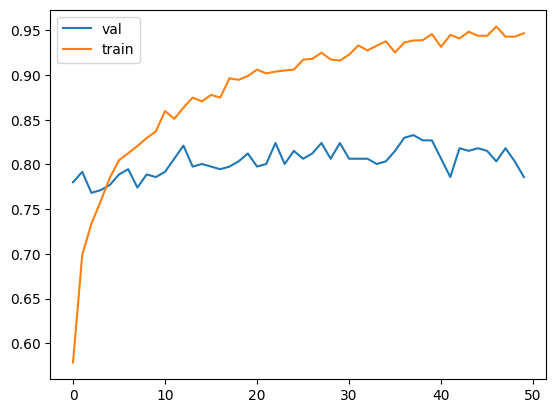

In [63]:
hist = history.history

plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')
plt.legend()

# 8.11 Training a larger model

- train a 299x299 model

Previously, we trained model on 150x150 images. The reason for this is that smaller model is trained faster, so we can iterate more and experiment faster

In [50]:
# add images size parameter to model training function:
def make_model(
        input_size=150,
        learning_rate=0.01,
        size_inner=100,
        droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )
    base_model.trainable=False

    ##############################
    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    # dropout:
    drop = keras.layers.Dropout(droprate)(inner) # droprate - how big size of inner layer we want to freeze

    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    ##############################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # from logits = True  for Raw values without Activation
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy'])

    return model

In [57]:
input_size = 299

train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [58]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [59]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=[checkpoint])

Epoch 1/20
96/96 [==============================] - 456s 5s/step - loss: 0.9765 - accuracy: 0.6900 - val_loss: 0.5565 - val_accuracy: 0.8328
Epoch 2/20
96/96 [==============================] - 446s 5s/step - loss: 0.5251 - accuracy: 0.8227 - val_loss: 0.4667 - val_accuracy: 0.8475
Epoch 3/20
96/96 [==============================] - 875s 9s/step - loss: 0.4287 - accuracy: 0.8527 - val_loss: 0.3906 - val_accuracy: 0.8798
Epoch 4/20
96/96 [==============================] - 1116s 12s/step - loss: 0.3765 - accuracy: 0.8752 - val_loss: 0.4081 - val_accuracy: 0.8504
Epoch 5/20
96/96 [==============================] - 1112s 12s/step - loss: 0.3512 - accuracy: 0.8807 - val_loss: 0.3740 - val_accuracy: 0.8827
Epoch 6/20
96/96 [==============================] - 911s 9s/step - loss: 0.3252 - accuracy: 0.8849 - val_loss: 0.3767 - val_accuracy: 0.8680
Epoch 7/20
96/96 [==============================] - 998s 10s/step - loss: 0.2871 - accuracy: 0.9029 - val_loss: 0.3506 - val_accuracy: 0.8856
Epoch 8/

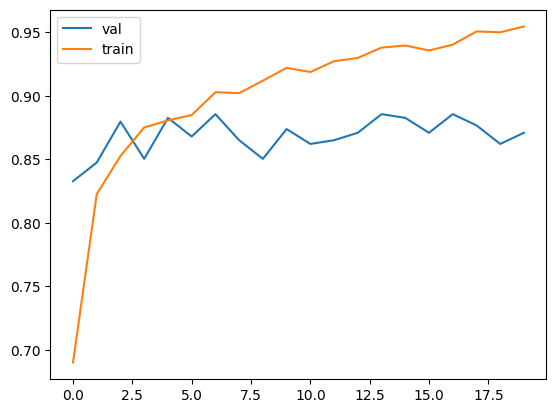

In [60]:
hist = history.history

plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')
plt.legend()

# Using the model

- loading the model
- evaluating the model
- getting predictions

In [70]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [66]:
# load model:
model = keras.models.load_model('xception_v4_07_0.886.h5')

In [67]:
model

In [68]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [69]:
model.evaluate(test_ds)

12/12 [==============================] - 46s 4s/step - loss: 0.2828 - accuracy: 0.9005


[0.2828340232372284, 0.9005376100540161]

this function returns:
1. loss values
2. accuracy

accuracy on test data is 90% which is similar to the validation accuracy  
this means that the model is pretty stable to the different data and has reasonably good performance

In [71]:
path = 'clothing-dataset-small/test/pants/046d0a65-f5a6-47f6-afaf-e692bfcfcb00.jpg'

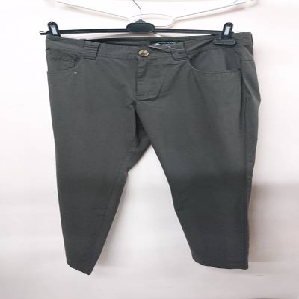

In [87]:
img = load_img(path, target_size=(299, 299))
img

In [88]:
import numpy as np

In [89]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [90]:
X

array([[[[255, 253, 255],
         [255, 253, 255],
         [255, 253, 255],
         ...,
         [255, 253, 254],
         [255, 253, 254],
         [255, 253, 254]],

        [[255, 253, 255],
         [255, 253, 255],
         [255, 253, 255],
         ...,
         [254, 252, 253],
         [254, 252, 253],
         [254, 252, 253]],

        [[255, 253, 255],
         [255, 253, 255],
         [255, 253, 255],
         ...,
         [253, 251, 252],
         [253, 251, 252],
         [253, 251, 252]],

        ...,

        [[204, 195, 198],
         [204, 195, 198],
         [204, 195, 198],
         ...,
         [198, 189, 190],
         [201, 192, 193],
         [206, 197, 198]],

        [[203, 194, 197],
         [203, 194, 197],
         [203, 194, 197],
         ...,
         [199, 190, 191],
         [202, 193, 194],
         [207, 198, 199]],

        [[202, 193, 196],
         [202, 193, 196],
         [202, 193, 196],
         ...,
         [196, 187, 188],
        

In [91]:
X = preprocess_input(X)
X

array([[[[1.        , 0.9843137 , 1.        ],
         [1.        , 0.9843137 , 1.        ],
         [1.        , 0.9843137 , 1.        ],
         ...,
         [1.        , 0.9843137 , 0.99215686],
         [1.        , 0.9843137 , 0.99215686],
         [1.        , 0.9843137 , 0.99215686]],

        [[1.        , 0.9843137 , 1.        ],
         [1.        , 0.9843137 , 1.        ],
         [1.        , 0.9843137 , 1.        ],
         ...,
         [0.99215686, 0.9764706 , 0.9843137 ],
         [0.99215686, 0.9764706 , 0.9843137 ],
         [0.99215686, 0.9764706 , 0.9843137 ]],

        [[1.        , 0.9843137 , 1.        ],
         [1.        , 0.9843137 , 1.        ],
         [1.        , 0.9843137 , 1.        ],
         ...,
         [0.9843137 , 0.96862745, 0.9764706 ],
         [0.9843137 , 0.96862745, 0.9764706 ],
         [0.9843137 , 0.96862745, 0.9764706 ]],

        ...,

        [[0.6       , 0.5294118 , 0.5529412 ],
         [0.6       , 0.5294118 , 0.5529412 ]

In [92]:
pred = model.predict(X)
pred[0]

1/1 [==============================] - 0s 148ms/step


array([-1.7785742 , -2.5083091 , -2.4701912 , -0.6540035 ,  7.656995  ,
       -2.8905606 , -1.8986329 ,  4.844777  ,  0.06701326, -3.7378106 ],
      dtype=float32)

In [93]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [94]:
dict(zip(classes, pred[0]))

{'dress': -1.7785742,
 'hat': -2.5083091,
 'longsleeve': -2.4701912,
 'outwear': -0.6540035,
 'pants': 7.656995,
 'shirt': -2.8905606,
 'shoes': -1.8986329,
 'shorts': 4.844777,
 'skirt': 0.067013256,
 't-shirt': -3.7378106}

# Summary

- We can use pre-trained models for general image classification
- Convolutional layers let us turn an image into a vector
- Dense layers use the vector to make the predictions
- Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
- First, train a small model (150x150) before training a big one (299x299)
- Learning rate - how fast the model trains. Fast learners are not the best ones
- We can save the model using callbacks and checkpointing
- To avoid overfitting, use dropout and augmentation